### Investigating memory

Updated: 25/01/24

The purpose of this notebook is to identify memory in a particular black hole simulation by subtracting the late times h from the early times h. By combining the memory across all modes, the aim is to identify whether memory primarily shows up in the (2,0) mode as is expected, or does it show up in the quadratic (2,2,0,1)x(2,-,2,0,-1)? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfitsrd as qnmfits
from multiprocessing import Pool
from spatial_reconstruction_tests import *
from qnmfitsrd.CCE_file_getter import *

In [3]:
CCE_sim305 = CCE_to_sim_simplified(sim_num='0305')

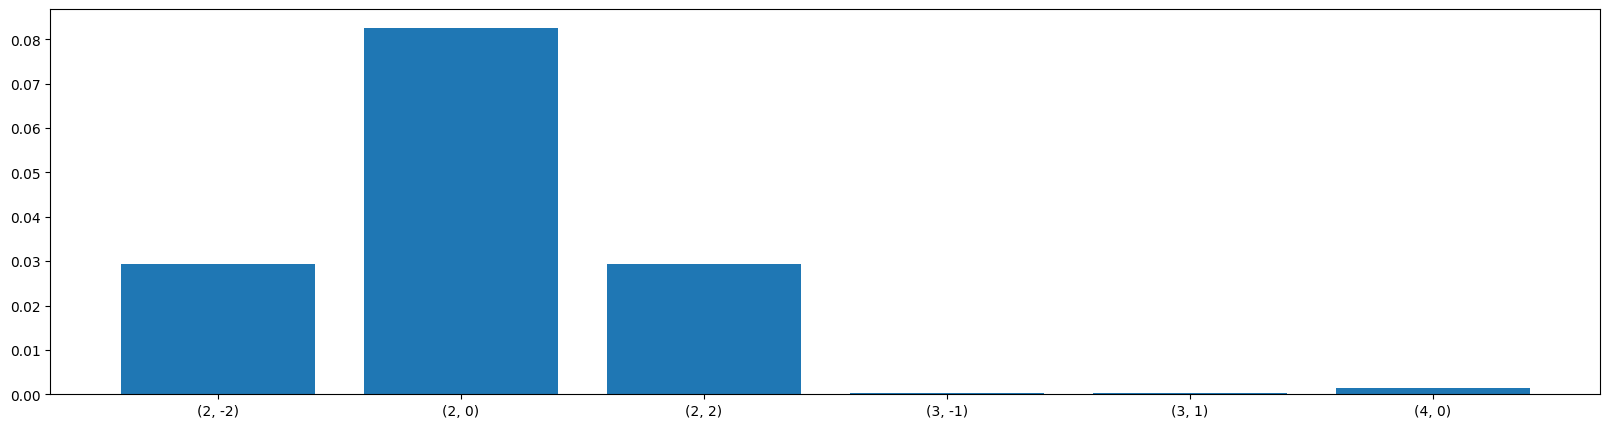

In [30]:
spherical_modes = CCE_sim305.h.keys() 

h_diffs = []
modes_used = [] 

for mode in spherical_modes:
    l,m = mode 
    h_diff = abs(CCE_sim305.h[l,m][0] - CCE_sim305.h[l,m][-1])
    if h_diff > 1e-4:
        h_diffs.append(h_diff)
        modes_used.append(str(mode))

fig, ax = plt.subplots(figsize=(20,5))
plt.bar(modes_used, h_diffs)